In [1]:
import torch, torch.nn as nn, torch.nn.functional as F
import pytorch_lightning as pl
import re, random
from textwrap import wrap
from matplotlib import pyplot as plt
from hsqc_split_Unet import UNet
from hsqc_split_dataset import HsqcDataModule
# from datasets.hsqc_folder_dataset import FolderDataModule
# from utils.ranker import RankingSet

# from rdkit import Chem
# from rdkit.Chem import AllChem, Draw
# from rdkit.Chem.Draw import IPythonConsole, SimilarityMaps

In [4]:
checkpoint = torch.load('/root/HSQC_split/exp_results/default/v/checkpoints/last.ckpt', map_location=lambda storage, loc: storage)
# checkpoint

In [3]:
import json
name = 'default'
f = open('/root/HSQC_split/configs/'+ name + '.json')
config = json.load(f)
model=UNet(config)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [9]:
dm = HsqcDataModule(32)
dm.setup("test")

loader = dm.test_dataloader()

In [12]:
for data in loader:
    hsqc_display, hsqc_overlap1, hsqc_overlap2 = data
    out = model(hsqc_display) * hsqc_display
    _, prediction = torch.max(out, 1)
    break


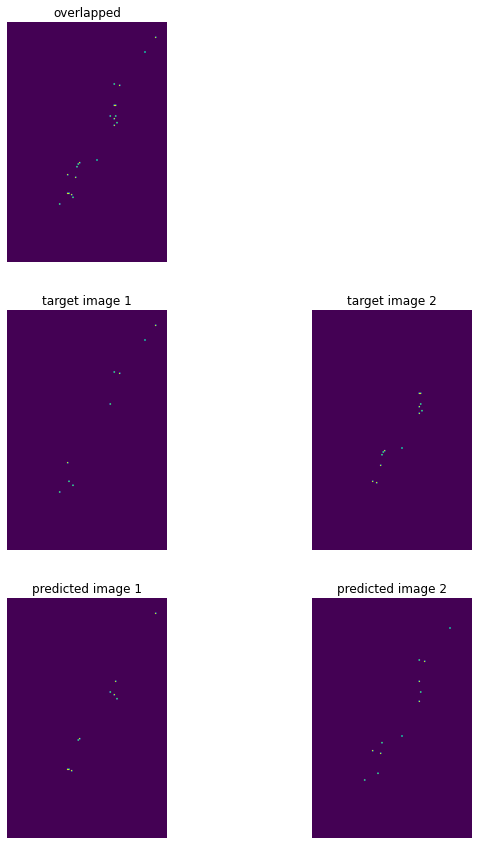

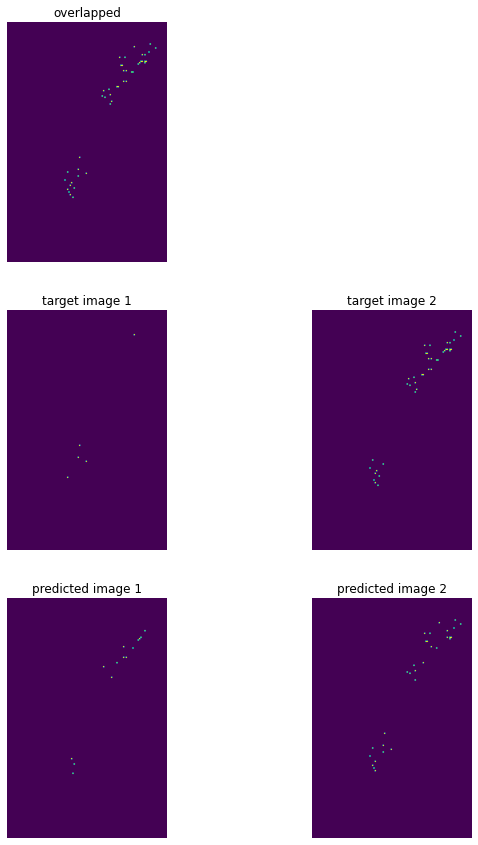

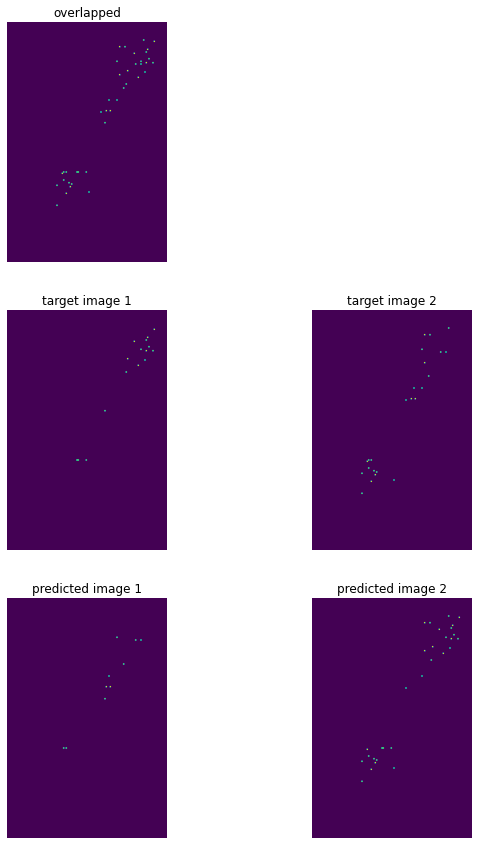

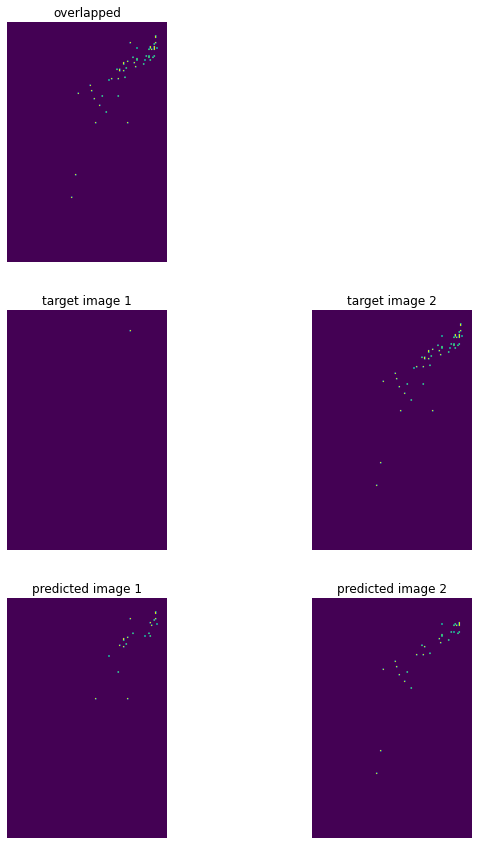

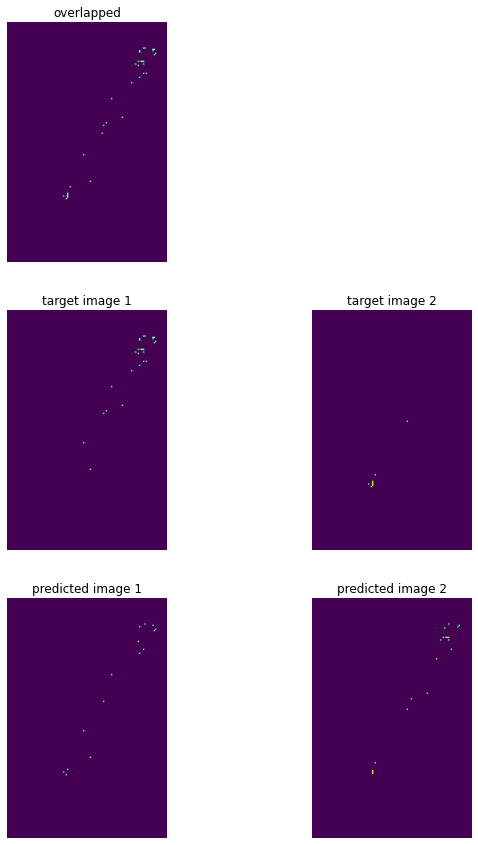

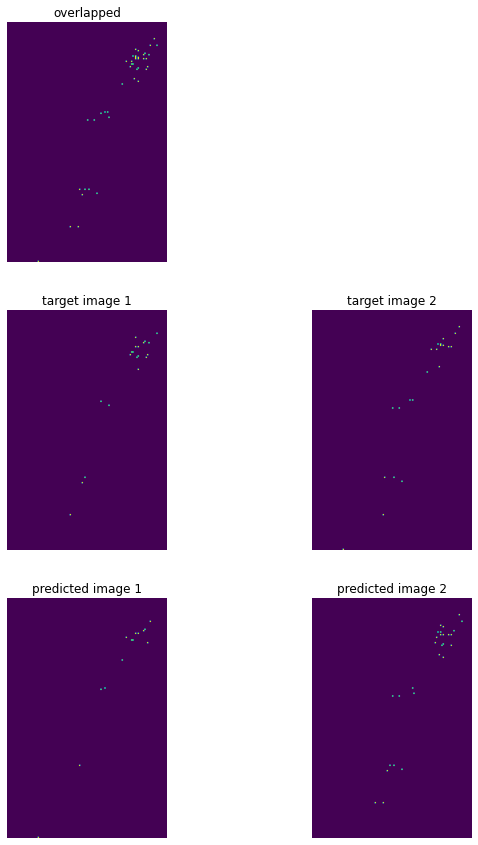

In [22]:
rows, columns=3,2
for i in range (out.shape[0]):
    fig = plt.figure(figsize=(10, 15))

    fig.add_subplot(rows, columns, 1)
    plt.imshow(hsqc_display[i,0])
    plt.axis('off')
    plt.title("overlapped")
    
    
    fig.add_subplot(rows, columns, 3)
    plt.axis('off')
    plt.title("target image 1")
    plt.imshow(hsqc_overlap1[i,0]>1 )
    
    fig.add_subplot(rows, columns, 4)
    plt.axis('off')
    plt.title("target image 2")
    plt.imshow(hsqc_overlap2[i,0]>1 )
    
    fig.add_subplot(rows, columns, 5)
    plt.axis('off')
    plt.title("predicted image 1")
    plt.imshow(prediction[i]>1 )
    
    fig.add_subplot(rows, columns, 6)
    plt.axis('off')
    plt.title("predicted image 2")
    plt.imshow((prediction[i]==1)+(prediction[i]==3) )
    if i==5: 
        break